In [1]:
# Importing basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
# Importing Sklearn module and classes
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [2]:
#Load dataset
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
Y = iris.target

In [3]:
#Create Training / Test Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify=Y)

In [4]:
#Perform Feature Scaling
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [5]:
#Train a Logistic Regression Model
# Create an instance of LogisticRegression classifier
lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')
 
# Fit the model
#
lr.fit(X_train_std, Y_train)

LogisticRegression(C=100.0, multi_class='ovr', random_state=1)

In [6]:
#Measure Model Performance
# Create the predictions
#
Y_predict = lr.predict(X_test_std)
 
# Use metrics.accuracy_score to measure the score
print("LogisticRegression Accuracy %.3f" %metrics.accuracy_score(Y_test, Y_predict))

LogisticRegression Accuracy 0.956


In [9]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(Y_test, Y_predict)

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  2, 13]])

In [10]:
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      1.00      0.94        15
           2       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



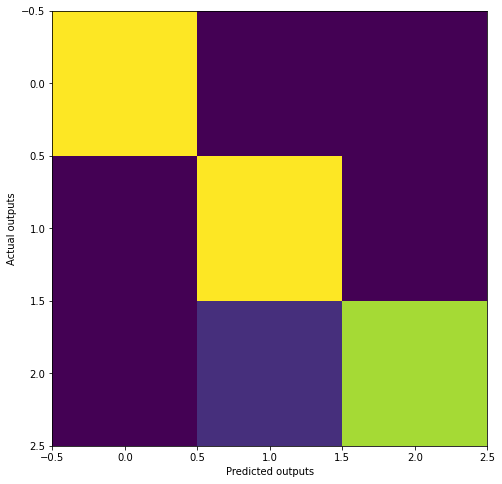

In [15]:
cm = confusion_matrix(Y_test, Y_predict)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs',  color='black')
ax.set_ylabel('Actual outputs', color='black')
plt.show()